<a href="https://colab.research.google.com/github/Lucas-Buk/Machine-Learning-Metodos-Nao-Prob/blob/main/Aula_3_Exs_2_e_3_ru%C3%ADdo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 3 
#Ex 2

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Pós/ML MNP/Datasets/A2EX4-ruído.csv')
df.head()

,Nivel,Aceitavel
0,55.3,1
1,56.1,1
2,57.9,1
3,65.3,1
4,55.9,1


In [3]:
# Modelo 1
X1 = df[['Nivel']]
y1 = df['Aceitavel']

print(f"Dimensões de X1: {X1.shape}")
print(f"Dimensões de y1: {y1.shape}")

Dimensões de X1: (77, 1)
Dimensões de y1: (77,)


In [4]:
# Treinamento do Modelo 1
modelo1 = LogisticRegression()
modelo1.fit(X1,y1)

print(f'Coeficientes do modelo: {modelo1.intercept_} {modelo1.coef_}')

Coeficientes do modelo: [22.87530798] [[-0.35404057]]


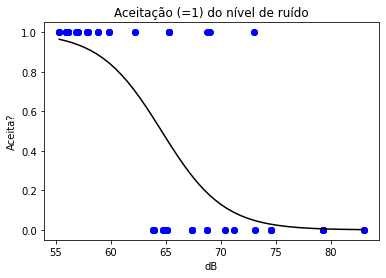

In [5]:
# Análise gráfica
# Diagrama de dispersão entre y (falha) e a temperatura
plt.scatter(X1,y1,color = 'blue')
plt.title("Aceitação (=1) do nível de ruído")
plt.xlabel("dB")
plt.ylabel("Aceita?")
 
# Cria um array com 50 valores
x_graf = np.linspace(start = np.min(X1),stop = np.max(X1),num = 50)
x_graf = x_graf.reshape(-1,1)           # Ajusta as dimensões: 50 linhas, 1 coluna
y_graf = modelo1.predict_proba(x_graf)   # Calula os valores de y correspondentes
 
# Traça a curva do modelo sobre o diagrama de dispersão
plt.plot(x_graf,y_graf[:,1],color = 'black')  # Obs.: utiliza a segunda coluna de "y_graf"
plt.show()    # "Consolida" a exibição dos gráficos

In [6]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, classification_report

y1_prev = modelo1.predict(X1)
print(confusion_matrix(y1,y1_prev))

[[31  6]
 [ 8 32]]


In [7]:
print(classification_report(y1,y1_prev))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.84      0.80      0.82        40

    accuracy                           0.82        77
   macro avg       0.82      0.82      0.82        77
weighted avg       0.82      0.82      0.82        77



In [8]:
print(modelo1.score(X1,y1))

0.8181818181818182


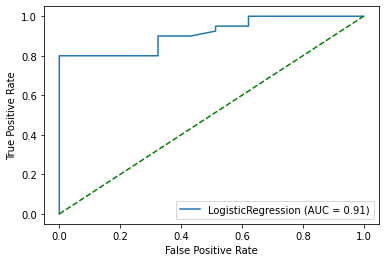

In [9]:
# Curva ROC do modelo 1
from sklearn.metrics import plot_roc_curve

plot_roc_curve(modelo1,X1,y1)
plt.plot([0,1],[0,1], 'k--',color='green') # Curva modelo aleatório
plt.show()

# Ex3 - KNN

In [10]:
# Classificação via algoritmo KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
 
escalador = StandardScaler()   # Instância
escalador.fit(X1)
 
# Normalização
X1_Norm = escalador.transform(X1)
 
# Treinamento do modelo
modeloKNN = KNeighborsClassifier(n_neighbors = 1)
modeloKNN.fit(X1_Norm,y1)
 
# Matriz de confusão e métricas para o modelo de classificação via KNN
y_prevKNN = modeloKNN.predict(X1_Norm)   # Usa os dados de treino
 
print(confusion_matrix(y1,y_prevKNN))
print(classification_report(y1,y_prevKNN))

[[37  0]
 [ 1 39]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.97      0.99        40

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77



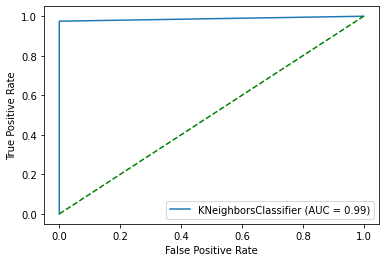

In [11]:
plot_roc_curve(modeloKNN,X1_Norm,y1)
plt.plot([0,1],[0,1], 'k--',color='green') # Curva modelo aleatório
plt.show()